In [14]:
# Gdrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# Libs
import os
import io
import json
import distutils.dir_util

import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pickle

from collections import Counter, defaultdict
from itertools import chain

In [16]:
# Functions
def write_json(data, fname):
    def _conv(o):
        if isinstance(o, (np.int64, np.int32)):
            return int(o)
        raise TypeError

    parent = os.path.dirname(fname)
    distutils.dir_util.mkpath(parent)

    with io.open(fname, "w", encoding="utf-8") as f:
        json_str = json.dumps(data, ensure_ascii=False, default=_conv)
        f.write(json_str)


def load_json(fname):
    with open(fname, encoding='utf-8') as f:
        json_obj = json.load(f)

    return json_obj

In [68]:
 # Datasets
CURR_DIR_NAME = 'GITHUB/FinalProject/Modeling/Test/'
PATH = f'/content/drive/MyDrive/' + CURR_DIR_NAME

train = load_json(PATH + 'test.json')
val = load_json(PATH + 'val.json')
test = load_json(PATH + 'test.json')

data = train + val + test
data_df = pd.DataFrame(data)
data_df.tail()

,tags,id,plylst_title,songs,like_cnt,updt_date
44490,[추억],137930,,"[323755, 397594, 445908, 570242, 221853, 20018...",16,2016-04-18 11:02:09.000
44491,"[띵곡의, 우울, 분위기, 드라이브, 산책]",936,,"[105140, 582252, 199262, 422915, 547967, 48791...",1,2020-04-08 07:15:59.000
44492,[기분전환],110589,,"[21976, 207746, 40025, 31635, 567462, 641799, ...",6,2016-06-29 00:57:21.000
44493,[여름],2605,,"[234554, 265033, 507260, 83092, 366757, 497097...",4,2015-06-06 09:52:01.000
44494,[],126651,,"[685111, 20039, 634240, 519385, 321994, 525309...",14,2015-10-26 17:43:30.000


In [69]:
# 1. 일정 count 아래의 음악은 제외
data_df['songs_counter'] = data_df['songs'].map(lambda x: Counter(x))

data_df.head()

,tags,id,plylst_title,songs,like_cnt,updt_date,songs_counter
0,[],70107,,"[398985, 449403, 411543, 528044, 143048, 98020...",6,2012-09-29 01:57:26.000,"{398985: 1, 449403: 1, 411543: 1, 528044: 1, 1..."
1,"[나만의Best3, 인디아티스트들의추천음악]",7461,,"[196298, 269984, 267805, 175867, 529244, 63825...",0,2019-12-17 14:06:45.000,"{196298: 1, 269984: 1, 267805: 1, 175867: 1, 5..."
2,[드라이브],90348,,"[273433, 331003, 68432, 411659, 117793, 616860...",21,2015-05-23 10:44:48.000,"{273433: 1, 331003: 1, 68432: 1, 411659: 1, 11..."
3,[분위기],58617,,"[702227, 48152, 440008, 358488, 701041, 540721...",0,2019-03-14 09:47:34.000,"{702227: 1, 48152: 1, 440008: 1, 358488: 1, 70..."
4,[],102395,,"[630683, 481582, 528550, 285114, 506667, 17922...",38,2018-07-11 16:43:32.000,"{630683: 1, 481582: 1, 528550: 1, 285114: 1, 5..."


In [70]:
if os.path.exists(PATH + 'songs_counter.json'):
    songs_counter = load_json(PATH + 'songs_counter.json')
    print('load songs_counter')
else:
    songs_counter = Counter()
    for playlist in data:
        songs_counter += Counter(playlist['songs'])
    
    print('write songs_counter')
    write_json(songs_counter, PATH + 'songs_counter.json')

load songs_counter


In [71]:
data_df['songs_counter'] = data_df['songs'].map(lambda x: Counter(x))

data_df.head()

,tags,id,plylst_title,songs,like_cnt,updt_date,songs_counter
0,[],70107,,"[398985, 449403, 411543, 528044, 143048, 98020...",6,2012-09-29 01:57:26.000,"{398985: 1, 449403: 1, 411543: 1, 528044: 1, 1..."
1,"[나만의Best3, 인디아티스트들의추천음악]",7461,,"[196298, 269984, 267805, 175867, 529244, 63825...",0,2019-12-17 14:06:45.000,"{196298: 1, 269984: 1, 267805: 1, 175867: 1, 5..."
2,[드라이브],90348,,"[273433, 331003, 68432, 411659, 117793, 616860...",21,2015-05-23 10:44:48.000,"{273433: 1, 331003: 1, 68432: 1, 411659: 1, 11..."
3,[분위기],58617,,"[702227, 48152, 440008, 358488, 701041, 540721...",0,2019-03-14 09:47:34.000,"{702227: 1, 48152: 1, 440008: 1, 358488: 1, 70..."
4,[],102395,,"[630683, 481582, 528550, 285114, 506667, 17922...",38,2018-07-11 16:43:32.000,"{630683: 1, 481582: 1, 528550: 1, 285114: 1, 5..."


In [72]:
def count_plylst_songs(_counter):
    return sum(songs_counter[str(_id)] for _id in _counter)


data_df['songs_total_cnt'] = data_df['songs_counter'].apply(lambda x: count_plylst_songs(x))

In [73]:
data_df = data_df.drop('songs_counter', axis=1)

In [74]:
data_df.to_json(PATH + "data_count_origin.json")

In [75]:
data_count_df = pd.DataFrame(load_json(PATH +'data_count_origin.json'))

data_count_df

,tags,id,plylst_title,songs,like_cnt,updt_date,songs_total_cnt
0,[],70107,,"[398985, 449403, 411543, 528044, 143048, 98020...",6,2012-09-29 01:57:26.000,1247
1,"[나만의Best3, 인디아티스트들의추천음악]",7461,,"[196298, 269984, 267805, 175867, 529244, 63825...",0,2019-12-17 14:06:45.000,185
2,[드라이브],90348,,"[273433, 331003, 68432, 411659, 117793, 616860...",21,2015-05-23 10:44:48.000,1713
3,[분위기],58617,,"[702227, 48152, 440008, 358488, 701041, 540721...",0,2019-03-14 09:47:34.000,409
4,[],102395,,"[630683, 481582, 528550, 285114, 506667, 17922...",38,2018-07-11 16:43:32.000,52
...,...,...,...,...,...,...,...
44490,[추억],137930,,"[323755, 397594, 445908, 570242, 221853, 20018...",16,2016-04-18 11:02:09.000,172
44491,"[띵곡의, 우울, 분위기, 드라이브, 산책]",936,,"[105140, 582252, 199262, 422915, 547967, 48791...",1,2020-04-08 07:15:59.000,5182
44492,[기분전환],110589,,"[21976, 207746, 40025, 31635, 567462, 641799, ...",6,2016-06-29 00:57:21.000,350
44493,[여름],2605,,"[234554, 265033, 507260, 83092, 366757, 497097...",4,2015-06-06 09:52:01.000,651


In [76]:
min(data_df['songs_total_cnt']), max(data_df['songs_total_cnt'])

(0, 13397)

(array([9.661e+03, 1.973e+03, 1.694e+03, 1.251e+03, 1.107e+03, 1.010e+03,
        8.350e+02, 8.600e+02, 7.290e+02, 6.940e+02, 7.090e+02, 5.880e+02,
        5.520e+02, 5.780e+02, 4.650e+02, 5.300e+02, 5.330e+02, 5.040e+02,
        3.930e+02, 4.810e+02, 4.700e+02, 4.110e+02, 4.520e+02, 3.620e+02,
        3.580e+02, 3.590e+02, 3.300e+02, 3.560e+02, 2.880e+02, 2.620e+02,
        3.460e+02, 2.930e+02, 2.730e+02, 2.630e+02, 2.380e+02, 2.740e+02,
        2.370e+02, 2.610e+02, 2.580e+02, 2.150e+02, 2.450e+02, 2.190e+02,
        2.510e+02, 1.890e+02, 2.260e+02, 2.170e+02, 1.950e+02, 1.860e+02,
        1.780e+02, 1.810e+02, 1.860e+02, 1.960e+02, 1.700e+02, 1.430e+02,
        1.560e+02, 1.600e+02, 1.670e+02, 1.650e+02, 1.270e+02, 1.410e+02,
        1.280e+02, 1.390e+02, 1.360e+02, 1.050e+02, 1.280e+02, 1.190e+02,
        1.400e+02, 9.600e+01, 1.310e+02, 1.610e+02, 1.350e+02, 1.040e+02,
        9.600e+01, 1.220e+02, 9.500e+01, 1.010e+02, 8.400e+01, 9.500e+01,
        1.020e+02, 1.070e+02, 8.700e+0

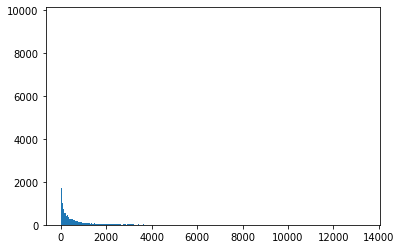

In [77]:
plt.hist(data_df['songs_total_cnt'], bins=1000)

In [84]:
def get_outlier(df=None, column=None, percent=25, weight=1.5):
  _quantile = np.percentile(df[column].values, percent)

  # IQR = quantile_75 - quantile_25
  # IQR_weight = IQR*weight
  
  lowest = _quantile
  # lowest = quantile_25 - IQR_weight
  # highest = quantile_75 + IQR_weight
  
  # outlier_idx = df[column][(df[column] < lowest) | (df[column] > highest)].index
  outlier_idx = df[column][(df[column] < lowest)].index
  return outlier_idx

# 함수 사용해서 이상치 값 삭제
for percent in [25, 50, 75]:
    data_df = pd.DataFrame(load_json(PATH + 'data_count_origin.json'))
    outlier_idx = get_outlier(df=data_df, column='songs_total_cnt', percent=percent, weight=0)
    data_df.drop(outlier_idx, axis=0, inplace=True)
    data_df.to_json(PATH + f"data_{percent}_ver1.json")

In [85]:
data_25_df = pd.DataFrame(load_json(PATH + 'data_25_ver1.json'))
data_50_df = pd.DataFrame(load_json(PATH + 'data_50_ver1.json'))
data_75_df = pd.DataFrame(load_json(PATH + 'data_75_ver1.json'))

len: 33407, min: 23, max: 13397


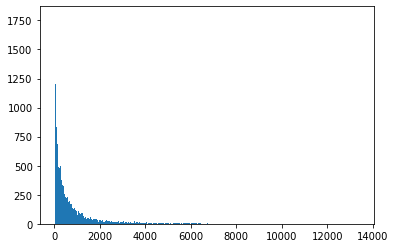

In [104]:
plt.hist(data_25_df['songs_total_cnt'], bins=1000)
_len, _min, _max = len(data_25_df), min(data_25_df['songs_total_cnt']), max(data_25_df['songs_total_cnt'])
print(f'len: {_len}, min: {_min}, max: {_max}')

len: 22254, min: 188, max: 13397


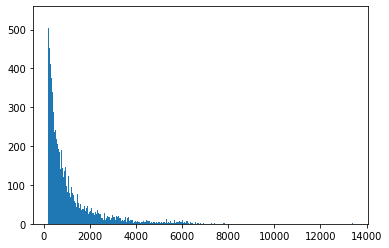

In [105]:
plt.hist(data_50_df['songs_total_cnt'], bins=1000)
_len, _min, _max = len(data_50_df), min(data_50_df['songs_total_cnt']), max(data_50_df['songs_total_cnt'])
print(f'len: {_len}, min: {_min}, max: {_max}')

len: 11136, min: 657, max: 13397


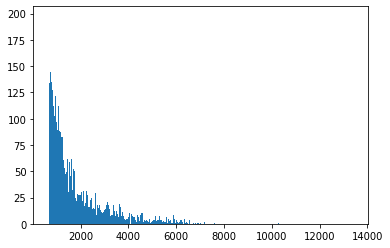

In [106]:
plt.hist(data_75_df['songs_total_cnt'], bins=1000)
_len, _min, _max = len(data_75_df), min(data_75_df['songs_total_cnt']), max(data_75_df['songs_total_cnt'])
print(f'len: {_len}, min: {_min}, max: {_max}')